In [1]:
import os.path

import pandas as pd
import os
os.chdir('../')


In [2]:
from IDV_CS_Model import *
from CS_based_early_stopping import *
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
import numpy as np
from collections import Counter
import sys
import json
DATA_DIR = '../data/Evaluation_CoTs/Final_results'
# DF_NAME = 'GSM8K'
# DIFFICULTY = 'easy'
# NUM_OF_SAMPLES = 500
# NUM_OF_COT = 40
# MODEL = 'gpt-3.5-turbo-0125'

In [3]:
df_with_features = pd.read_json(os.path.join(DATA_DIR,'final_with_feature.json'))

In [4]:
feature_li = [
    'QUA_IM',
    'DIF_IV',
    'SIM_COT_AGG',
    'SIM_AC_BIGRAM',
    'SIM_AC_AGG',
    'SIM_AC_PW',
]
coe = [-5, -5, 3, 2, 1, 3]
intercept = -2.7
df_with_features

,id,Name,Model,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,SIM_COT_AGG,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW
0,0,GSM8K_test,claude-3-haiku-20240307,18.0,"[18.0, 18.0, 26.0, 18.0, 18.0, 18.0, 18.0, 18....","[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, ...","[3, 3, 4, 3, 18, 4, 19, 15, 4, 3, 4, 3, 4, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.9647887324000001, 0.8013245033, 0.7962...","[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, ...","[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, ...","[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, ..."
1,1,GSM8K_test,claude-3-haiku-20240307,3.0,"[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 3, 7, 9, 6, 10, 6, 8, 7, 4, 3, 4, 5, 3, 3,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.74, 0.6071428571, 0.7471264368, 0.6988...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,2,GSM8K_test,claude-3-haiku-20240307,70000.0,"[70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 195.0, 70...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[16, 10, 19, 22, 10, 12, 9, 14, 18, 17, 9, 9, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.5528846154, 0.6950672646, 0.7092511013...","[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, ...","[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, ..."
3,3,GSM8K_test,claude-3-haiku-20240307,540.0,"[540.0, 540.0, 540.0, 540.0, 540.0, 540.0, 540...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[14, 14, 13, 7, 8, 9, 10, 12, 13, 9, 12, 14, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.8366013072, 0.7798742138, 0.7058823529...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,4,GSM8K_test,claude-3-haiku-20240307,20.0,"[20.0, 140.0, 10.0, 10.0, 20.0, 20.0, 20.0, 30...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, ...","[13, 16, 4, 3, 11, 3, 3, 3, 3, 12, 3, 3, 4, 4,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.0, 0.7120418848000001, 0.5, 0.558685446, 0....","[0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,6549,MathQA_challenge_test,gpt-4,d,"[error, error, error, error, error, error, err...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.6894409938, 0.7544910180000001, 0.6706...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
6550,6550,MathQA_challenge_test,gpt-4,c,"[error, error, error, error, error, error, err...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 3, 3, 3, 5, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, ...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.0, 0.6053811659, 0.6740088106000001, 0.6523...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
6551,6551,MathQA_challenge_test,gpt-4,c,"[error, error, error, error, error, error, err...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6, 5, 6, 4, 5, 4, 4, 4, 9, 6, 4, 4, 4, 4, 5, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [97]:
config = {
    'benchmark': ['all','gsm','bb','mathqa'],
    'llm' : ['all','gpt-4','gpt-3.5','claude-3'],
    'N': [i for i in range(1,16)],
    'threshold': [0.1*i for i in range(11)],
    'stop_algo':['PositiveN','ConsistencyN'],
    'approximator': [customized_LR_model,trained_LR_model]
}

In [6]:
def get_data(df,benchmark='all',llm = 'all'):
    if benchmark == 'gsm':
        df_ = df[df.Name.str.startswith('GSM')]
    elif benchmark =='bb':
        df_ = df[df.Name.str.startswith('Big')]
    elif benchmark == 'mathqa':
        df_ = df[df.Name.str.startswith('Math')]
    else:
        df_ = df
    
    if llm == 'gpt-4':
        df_final = df_[df_.Model.str.startswith('gpt-4')]
    elif llm == 'gpt-3.5':
        df_final = df_[df_.Model.str.startswith('gpt-3')]
    elif llm == 'claude-3':
        df_final = df_[df_.Model.str.startswith('claude-3')]
    else:
        df_final = df_
    return df_final

# step vs acc main

In [7]:
# result_buffer = {
#         'llm': [],
#         'benchmark':[],
#         'N': [],
#         'stop_algo':[],
#         'threshold': [],
#         'SC_ACC': [],
#         'ES_ACC': [],
#         'ASC_ACC': [],
#         'CASC_ACC': [],
#         'SC_Avg_Steps': [],
#         'ES_Avg_Steps': [],
#         'ASC_Avg_Steps': [],
#         'CASC_Avg_Steps': [],
#     }
# for benchmark in config['benchmark']:
#     for llm in config['llm']:
#         df_in = get_data(df_with_features,benchmark=benchmark,llm=llm)
#         print(llm,benchmark)
#         print('df_size is ',len(df_in))
#         df_cs, _ = config['approximator'][0](df=df_in, feature_li=feature_li, coe=coe, intercept=intercept)
#         N = 3
#         threshold = 0.5
#         stop_mechanism = 'PositiveN'
#         df_results, _ = CS_early_stopping(df=df_cs, threshold=threshold, N=N, stop_mechanism=stop_mechanism)
#         df_model_comp_dict = {
#                 'llm': llm,
#                 'benchmark':benchmark,
#                 'N': N,
#                 'stop_algo':stop_mechanism,
#                 'threshold': threshold,
#                 'SC_ACC': round(df_results.SC_correctness.sum() / len(df_results),4),
#                 'ES_ACC': round(df_results.ES_correctness.sum() / len(df_results),4),
#                 'ASC_ACC': round(df_results.asc_correctness.sum() / len(df_results),4),
#                 'CASC_ACC': round(df_results.CS_correctness.sum() / len(df_results),4),
#                 'SC_Avg_Steps': 40,
#                 'ES_Avg_Steps': round(df_results.ES_steps.mean(),2),
#                 'ASC_Avg_Steps': round(df_results.asc_steps.mean(),2),
#                 'CASC_Avg_Steps': round(df_results.CS_steps.mean(),2),
#             }
#         for key,val in df_model_comp_dict.items():
#             result_buffer[key].append(val)

In [8]:
# df_main_table = pd.DataFrame(result_buffer)
# df_main_table.to_csv('main_table.csv',index=False)
df_main_table = pd.read_csv('../src/experiment_collection/main_table.csv')
df_main_table

,llm,benchmark,N,stop_algo,threshold,SC_ACC,ES_ACC,ASC_ACC,CASC_ACC,SC_Avg_Steps,ES_Avg_Steps,ASC_Avg_Steps,CASC_Avg_Steps
0,all,all,3,PositiveN,0.5,0.5429,0.5432,0.5432,0.5450,40,14.40,12.44,6.03
1,gpt-4,all,3,PositiveN,0.5,0.6570,0.6553,0.6553,0.6587,40,8.14,7.00,5.35
2,gpt-3.5,all,3,PositiveN,0.5,0.5135,0.5135,0.5125,0.5243,40,15.79,13.76,6.41
3,claude-3,all,3,PositiveN,0.5,0.5495,0.5506,0.5516,0.5432,40,14.26,12.21,5.78
4,all,gsm,3,PositiveN,0.5,0.6442,0.6446,0.6433,0.6415,40,15.50,12.64,6.43
5,gpt-4,gsm,3,PositiveN,0.5,0.8205,0.8154,0.8154,0.8205,40,7.84,6.63,4.79
6,gpt-3.5,gsm,3,PositiveN,0.5,0.6340,0.6340,0.6310,0.6270,40,17.23,14.59,6.98
7,claude-3,gsm,3,PositiveN,0.5,0.6200,0.6220,0.6220,0.6210,40,15.26,11.87,6.19
8,all,bb,3,PositiveN,0.5,0.4588,0.4574,0.4601,0.4633,40,12.02,11.10,5.07
9,gpt-4,bb,3,PositiveN,0.5,0.5100,0.5150,0.5150,0.5000,40,7.40,6.38,4.37


# N study

In [114]:
# result_buffer = {
#         'llm': [],
#         'benchmark':[],
#         'N': [],
#         'stop_algo':[],
#         'threshold': [],
#         'SC_ACC': [],
#         'ES_ACC': [],
#         'ASC_ACC': [],
#         'CASC_ACC': [],
#         'SC_Avg_Steps': [],
#         'ES_Avg_Steps': [],
#         'ASC_Avg_Steps': [],
#         'CASC_Avg_Steps': [],
#     }
# for N in config['N']:
#     for benchmark in config['benchmark']:
#         for llm in config['llm']:
#             df_in = get_data(df_with_features,benchmark=benchmark,llm=llm)
#             print(llm,benchmark)
#             print('df_size is ',len(df_in))
#             df_cs, _ = config['approximator'][0](df=df_in, feature_li=feature_li, coe=coe, intercept=intercept)
#             threshold = 0.5
#             stop_mechanism = 'PositiveN'
#             df_results, _ = CS_early_stopping(df=df_cs, threshold=threshold, N=N, stop_mechanism=stop_mechanism)
#             df_model_comp_dict = {
#                     'llm': llm,
#                     'benchmark':benchmark,
#                     'N': N,
#                     'stop_algo':stop_mechanism,
#                     'threshold': threshold,
#                     'SC_ACC': round(df_results.SC_correctness.sum() / len(df_results),4),
#                     'ES_ACC': round(df_results.ES_correctness.sum() / len(df_results),4),
#                     'ASC_ACC': round(df_results.asc_correctness.sum() / len(df_results),4),
#                     'CASC_ACC': round(df_results.CS_correctness.sum() / len(df_results),4),
#                     'SC_Avg_Steps': 40,
#                     'ES_Avg_Steps': round(df_results.ES_steps.mean(),2),
#                     'ASC_Avg_Steps': round(df_results.asc_steps.mean(),2),
#                     'CASC_Avg_Steps': round(df_results.CS_steps.mean(),2),
#                 }
#             for key,val in df_model_comp_dict.items():
#                 result_buffer[key].append(val)
# df_N_study = pd.DataFrame(result_buffer)
# df_N_study.to_csv('N_study_table.csv',index=False)

In [41]:
df_N_study = pd.read_csv('../src/experiment_collection/N_study_table.csv')
df_N_study

,llm,benchmark,N,stop_algo,threshold,SC_ACC,ES_ACC,ASC_ACC,CASC_ACC,SC_Avg_Steps,ES_Avg_Steps,ASC_Avg_Steps,CASC_Avg_Steps
0,all,all,1,PositiveN,0.5,0.5429,0.5432,0.5432,0.5308,40,14.40,12.44,2.70
1,gpt-4,all,1,PositiveN,0.5,0.6570,0.6553,0.6553,0.6469,40,8.14,7.00,2.41
2,gpt-3.5,all,1,PositiveN,0.5,0.5135,0.5135,0.5125,0.5034,40,15.79,13.76,2.83
3,claude-3,all,1,PositiveN,0.5,0.5495,0.5506,0.5516,0.5352,40,14.26,12.21,2.63
4,all,gsm,1,PositiveN,0.5,0.6442,0.6446,0.6433,0.6319,40,15.50,12.64,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,claude-3,bb,14,PositiveN,0.5,0.4699,0.4679,0.4719,0.4689,40,11.44,10.75,17.99
220,all,mathqa,14,PositiveN,0.5,0.5250,0.5269,0.5255,0.5508,40,15.69,13.58,24.38
221,gpt-4,mathqa,14,PositiveN,0.5,0.6443,0.6392,0.6392,0.6701,40,9.21,8.02,22.62
222,gpt-3.5,mathqa,14,PositiveN,0.5,0.4675,0.4695,0.4675,0.5122,40,16.58,14.26,24.62


In [42]:
def replace_zeros_with_previous_nonzero(initialize, arr):
    # Initialize a variable to keep track of the last non-zero value
    last_nonzero = initialize
    
    # Iterate over the array
    for i in range(len(arr)):
        if arr[i] != 0:
            # Update the last non-zero value
            last_nonzero = arr[i]
        else:
            # Replace zero with the last non-zero value
            arr[i] = last_nonzero
            
    return arr
# Create the line plot with solid lines


all all


[]

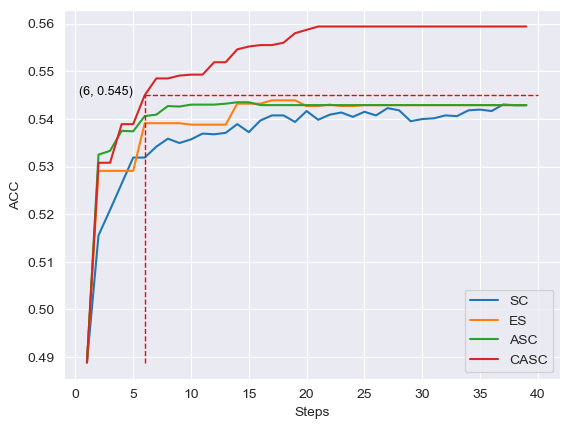

In [149]:
llm = 'all'
benchmark = 'all'
print(llm,benchmark)
sc_step_results = []
df_step = get_data(df_with_features,benchmark=benchmark,llm = llm)
for row_idx in range(len(df_step)):
    sample_results = []
    for i in range(40):
        if Counter(df_step['CoT answers'].iloc[row_idx][:i+1]).most_common(1)[0][0] == df_step['correct answer'].iloc[row_idx]:
            sample_results.append(1)
        else:
            sample_results.append(0)
    sc_step_results.append(sample_results)
sc_step_results = np.array(sc_step_results)
sc_step_results = sc_step_results.sum(axis=0)/sc_step_results.shape[0]
df_N_study_gpt4 = df_N_study[(df_N_study.llm == llm)]
df_N_study_gpt4_all = df_N_study_gpt4[df_N_study_gpt4.benchmark == benchmark]
casc_steps = df_N_study_gpt4_all['CASC_Avg_Steps'].to_numpy().astype(np.int32)
casc_acc = df_N_study_gpt4_all['CASC_ACC'].to_numpy()
casc_step_results = np.zeros(40)
for i, idx in enumerate(casc_steps):
    casc_step_results[idx] = casc_acc[i]
casc_step_results = replace_zeros_with_previous_nonzero(sc_step_results[0],casc_step_results)

es_steps = []
es_acc = []
for i in range(16):
    df_es_step = calculate_ES_correctness(df_step,i+1)
    es_acc.append(round(df_es_step.ES_correctness.sum() / len(df_es_step),4))
    es_steps.append(df_es_step.ES_steps.mean().astype(np.int32))
es_step_results = np.zeros(40)
for i, idx in enumerate(es_steps):
    es_step_results[idx] = es_acc[i]
es_step_results = replace_zeros_with_previous_nonzero(sc_step_results[0],es_step_results)

asc_steps = []
asc_acc = []
for i in range(75,101):
    df_asc_step = calculate_ASC_correctness(df_step,i*0.01)
    asc_acc.append(round(df_asc_step.asc_correctness.sum() / len(df_asc_step),4))
    asc_steps.append(df_asc_step.asc_steps.mean().astype(np.int32))
asc_step_results = np.zeros(40)
for i, idx in enumerate(asc_steps):
    asc_step_results[idx-1] = asc_acc[i]
asc_step_results = replace_zeros_with_previous_nonzero(sc_step_results[0],asc_step_results)

step_study_plot_dict = {
    'Steps': np.arange(40)[1:],
    'SC': sc_step_results[1:],
    'ES': es_step_results[1:],
    'ASC': asc_step_results[1:],
    'CASC':casc_step_results[1:]
}



plt.figure()
sns.lineplot(data=step_study_plot_dict, x='Steps', y='SC', label='SC', linestyle='-')
sns.lineplot(data=step_study_plot_dict, x='Steps', y='ES', label='ES', linestyle='-')
sns.lineplot(data=step_study_plot_dict, x='Steps', y='ASC', label='ASC', linestyle='-')
sns.lineplot(data=step_study_plot_dict, x='Steps', y='CASC', label='CASC', linestyle='-')

# Set the x and y axis labels
plt.xlabel('Steps')
plt.ylabel('ACC')

# Find the intersection point
x_intercept = None
for i in range(len(step_study_plot_dict['Steps']) - 1):
    if step_study_plot_dict['CASC'][i] < sc_step_results.max() <= step_study_plot_dict['CASC'][i+1]:
        x_intercept = step_study_plot_dict['Steps'][i]+1
        break

# Add the horizontal line (red line)
plt.hlines(y=0.545, xmin=x_intercept, xmax=40, color='red', linestyle='--', linewidth=1)

# Add the vertical line at the intersection point
if x_intercept is not None:
    plt.vlines(x=x_intercept, ymin=sc_step_results.min(), ymax=0.545, color='red', linestyle='--', linewidth=1)
    plt.annotate(f'({x_intercept}, {0.545})', xy=(x_intercept, 0.545), 
                 xytext=(x_intercept - 5.7, 0.545),
                 fontsize=9, color='black')

# Display the plot
plt.legend()
plt.savefig('../src/experiment_collection/main_step_acc_plot.jpg', dpi=300, bbox_inches='tight')
plt.plot()

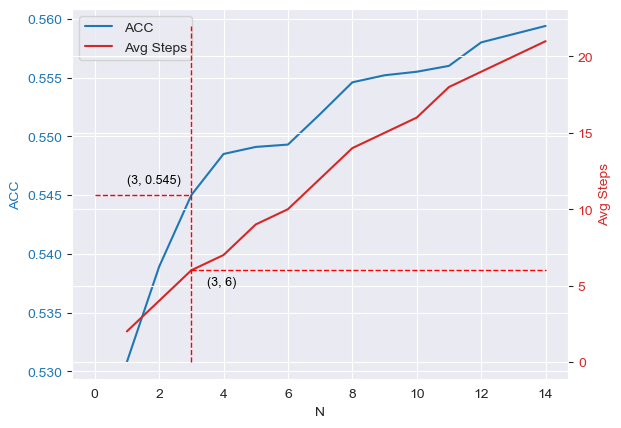

In [150]:
casc_N = df_N_study_gpt4_all['N'].to_numpy()
fig, ax1 = plt.subplots()

# Plot the first line (ACC) with ax1
color = 'tab:blue'
ax1.set_xlabel('N')
ax1.set_ylabel('ACC', color=color)
line1, = ax1.plot(casc_N, casc_acc, color=color, label='ACC')
ax1.tick_params(axis='y', labelcolor=color)
plt.hlines(y=casc_acc[2], xmin=0, xmax=3, color='red', linestyle='--', linewidth=1)
plt.annotate(f'({3}, {casc_acc[2]})', xy=(3, casc_acc[2]), 
                 xytext=(3 - 2, casc_acc[2]+0.001),
                 fontsize=9, color='black')
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Steps', color=color)
line2, = ax2.plot(casc_N, casc_steps, color=color, label='Avg Steps')
ax2.tick_params(axis='y', labelcolor=color)
plt.vlines(x=3, ymin=0, ymax=22, color='red', linestyle='--', linewidth=1)
plt.hlines(y=casc_steps[2], xmin=3, xmax=14, color='red', linestyle='--', linewidth=1)
plt.annotate(f'({3}, {casc_steps[2]})', xy=(3, casc_steps[2]), 
                 xytext=(3 +0.5, casc_steps[2]-1),
                 fontsize=9, color='black')
# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')
fig.savefig('../src/experiment_collection/N_study_plot.jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

# Threshold Study

In [45]:
# result_buffer = {
#         'llm': [],
#         'benchmark':[],
#         'N': [],
#         'stop_algo':[],
#         'threshold': [],
#         'SC_ACC': [],
#         'ES_ACC': [],
#         'ASC_ACC': [],
#         'CASC_ACC': [],
#         'SC_Avg_Steps': [],
#         'ES_Avg_Steps': [],
#         'ASC_Avg_Steps': [],
#         'CASC_Avg_Steps': [],
#     }
# for threshold in config['threshold']:
#     for benchmark in config['benchmark']:
#         for llm in config['llm']:
#             df_in = get_data(df_with_features,benchmark=benchmark,llm=llm)
#             print(llm,benchmark)
#             print('df_size is ',len(df_in))
#             df_cs, _ = config['approximator'][0](df=df_in, feature_li=feature_li, coe=coe, intercept=intercept)
#             N= 3
#             stop_mechanism = 'PositiveN'
#             df_results, _ = CS_early_stopping(df=df_cs, threshold=threshold, N=N, stop_mechanism=stop_mechanism)
#             df_model_comp_dict = {
#                     'llm': llm,
#                     'benchmark':benchmark,
#                     'N': N,
#                     'stop_algo':stop_mechanism,
#                     'threshold': threshold,
#                     'SC_ACC': round(df_results.SC_correctness.sum() / len(df_results),4),
#                     'ES_ACC': round(df_results.ES_correctness.sum() / len(df_results),4),
#                     'ASC_ACC': round(df_results.asc_correctness.sum() / len(df_results),4),
#                     'CASC_ACC': round(df_results.CS_correctness.sum() / len(df_results),4),
#                     'SC_Avg_Steps': 40,
#                     'ES_Avg_Steps': round(df_results.ES_steps.mean(),2),
#                     'ASC_Avg_Steps': round(df_results.asc_steps.mean(),2),
#                     'CASC_Avg_Steps': round(df_results.CS_steps.mean(),2),
#                 }
#             for key,val in df_model_comp_dict.items():
#                 result_buffer[key].append(val)

In [46]:
# df_threshold_study = pd.DataFrame(result_buffer)
# df_threshold_study.to_csv('threshold_study_table.csv',index=False)
df_threshold_study = pd.read_csv('../src/experiment_collection/threshold_study_table.csv')
df_threshold_study

,llm,benchmark,N,stop_algo,threshold,SC_ACC,ES_ACC,ASC_ACC,CASC_ACC,SC_Avg_Steps,ES_Avg_Steps,ASC_Avg_Steps,CASC_Avg_Steps
0,all,all,3,PositiveN,0.0,0.5429,0.5432,0.5432,0.5203,40,14.40,12.44,3.0
1,gpt-4,all,3,PositiveN,0.0,0.6570,0.6553,0.6553,0.6435,40,8.14,7.00,3.0
2,gpt-3.5,all,3,PositiveN,0.0,0.5135,0.5135,0.5125,0.4960,40,15.79,13.76,3.0
3,claude-3,all,3,PositiveN,0.0,0.5495,0.5506,0.5516,0.5202,40,14.26,12.21,3.0
4,all,gsm,3,PositiveN,0.0,0.6442,0.6446,0.6433,0.6128,40,15.50,12.64,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,claude-3,bb,3,PositiveN,1.0,0.4699,0.4679,0.4719,0.3617,40,11.44,10.75,40.0
172,all,mathqa,3,PositiveN,1.0,0.5250,0.5269,0.5255,0.3326,40,15.69,13.58,40.0
173,gpt-4,mathqa,3,PositiveN,1.0,0.6443,0.6392,0.6392,0.5464,40,9.21,8.02,40.0
174,gpt-3.5,mathqa,3,PositiveN,1.0,0.4675,0.4695,0.4675,0.3008,40,16.58,14.26,40.0


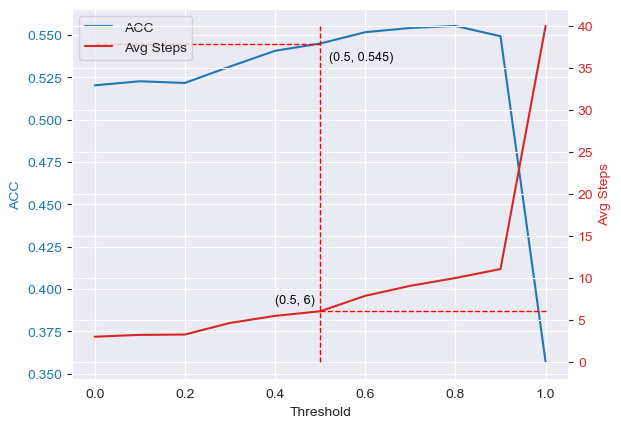

In [151]:
df_threshold_study_gpt4 = df_threshold_study[(df_threshold_study.llm == llm)]
df_threshold_study_gpt4_all = df_threshold_study_gpt4[df_threshold_study_gpt4.benchmark == benchmark]
th_casc_steps = df_threshold_study_gpt4_all['CASC_Avg_Steps'].to_numpy()
th_casc_acc = df_threshold_study_gpt4_all['CASC_ACC'].to_numpy()
th_casc_threshold = df_threshold_study_gpt4_all['threshold'].to_numpy()
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the first line (ACC) with ax1
color = 'tab:blue'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('ACC', color=color)
line1, = ax1.plot(th_casc_threshold, th_casc_acc, color=color, label='ACC')
ax1.tick_params(axis='y', labelcolor=color)
plt.hlines(y=th_casc_acc[5], xmin=0, xmax=0.5, color='red', linestyle='--', linewidth=1)
plt.annotate(f'({0.5}, {th_casc_acc[5]})', xy=(0.5, th_casc_acc[5]), 
                 xytext=(0.5 + 0.02, th_casc_acc[5]-0.01),
                 fontsize=9, color='black')
# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Avg Steps', color=color)
line2, = ax2.plot(th_casc_threshold, th_casc_steps, color=color, label='Avg Steps')
ax2.tick_params(axis='y', labelcolor=color)
plt.vlines(x=0.5, ymin=0, ymax=40, color='red', linestyle='--', linewidth=1)
plt.hlines(y=th_casc_steps[5], xmin=0.5, xmax=1, color='red', linestyle='--', linewidth=1)
plt.annotate(f'({0.5}, {6})', xy=(0.5, th_casc_steps[5]), 
                 xytext=(0.5 - 0.1, th_casc_steps[5]+1),
                 fontsize=9, color='black')
# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')
fig.savefig('../src/experiment_collection/threshold_study_plot.jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

<Axes: >

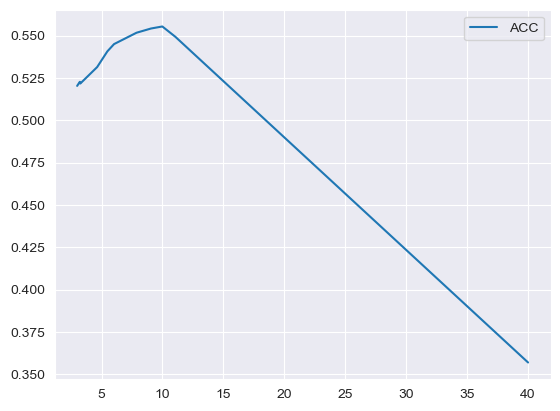

In [80]:
sns.lineplot( x=th_casc_steps, y=th_casc_acc, label='ACC', linestyle='-')

In [74]:
th_casc_acc[5]
th_casc_steps[5]

6.03

# Stop algo study

In [91]:
# result_buffer = {
#         'llm': [],
#         'benchmark':[],
#         'N': [],
#         'stop_algo':[],
#         'threshold': [],
#         'SC_ACC': [],
#         'ES_ACC': [],
#         'ASC_ACC': [],
#         'CASC_ACC': [],
#         'SC_Avg_Steps': [],
#         'ES_Avg_Steps': [],
#         'ASC_Avg_Steps': [],
#         'CASC_Avg_Steps': [],
#     }
# for stop_mechanism in config['stop_algo']:
#     for benchmark in config['benchmark']:
#         for llm in config['llm']:
#             df_in = get_data(df_with_features,benchmark=benchmark,llm=llm)
#             print(llm,benchmark)
#             print('df_size is ',len(df_in))
#             df_cs, _ = config['approximator'][0](df=df_in, feature_li=feature_li, coe=coe, intercept=intercept)
#             N= 3
#             threshold = 0.5
#             df_results, _ = CS_early_stopping(df=df_cs, threshold=threshold, N=N, stop_mechanism=stop_mechanism)
#             df_model_comp_dict = {
#                     'llm': llm,
#                     'benchmark':benchmark,
#                     'N': N,
#                     'stop_algo':stop_mechanism,
#                     'threshold': threshold,
#                     'SC_ACC': round(df_results.SC_correctness.sum() / len(df_results),4),
#                     'ES_ACC': round(df_results.ES_correctness.sum() / len(df_results),4),
#                     'ASC_ACC': round(df_results.asc_correctness.sum() / len(df_results),4),
#                     'CASC_ACC': round(df_results.CS_correctness.sum() / len(df_results),4),
#                     'SC_Avg_Steps': 40,
#                     'ES_Avg_Steps': round(df_results.ES_steps.mean(),2),
#                     'ASC_Avg_Steps': round(df_results.asc_steps.mean(),2),
#                     'CASC_Avg_Steps': round(df_results.CS_steps.mean(),2),
#                 }
#             for key,val in df_model_comp_dict.items():
#                 result_buffer[key].append(val)

In [109]:
# df_stop_algo_study = pd.DataFrame(result_buffer)
# df_stop_algo_study.to_csv('stop_algo_study_table.csv',index=False)
df_N_study_2 = pd.read_csv('../src/experiment_collection/N_study_table_ConsistencyN.csv')
df_N_study = pd.read_csv('../src/experiment_collection/N_study_table.csv')

all all


[]

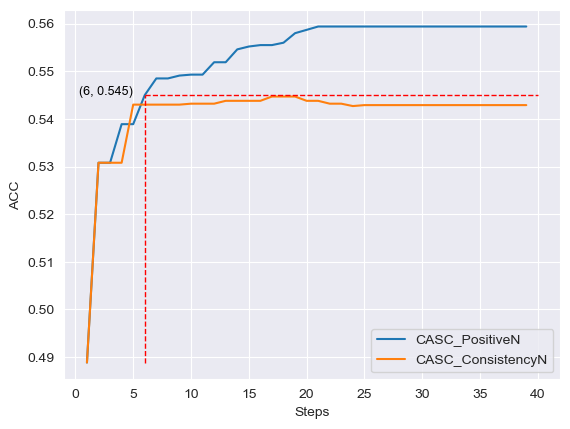

In [152]:
llm = 'all'
benchmark = 'all'
print(llm,benchmark)
sc_step_results = []
df_step = get_data(df_with_features,benchmark=benchmark,llm = llm)
for row_idx in range(len(df_step)):
    sample_results = []
    for i in range(40):
        if Counter(df_step['CoT answers'].iloc[row_idx][:i+1]).most_common(1)[0][0] == df_step['correct answer'].iloc[row_idx]:
            sample_results.append(1)
        else:
            sample_results.append(0)
    sc_step_results.append(sample_results)
sc_step_results = np.array(sc_step_results)
sc_step_results = sc_step_results.sum(axis=0)/sc_step_results.shape[0]

df_N_study_gpt4 = df_N_study[(df_N_study.llm == llm)]
df_N_study_gpt4_all = df_N_study_gpt4[df_N_study_gpt4.benchmark == benchmark]
casc_steps = df_N_study_gpt4_all['CASC_Avg_Steps'].to_numpy().astype(np.int32)
casc_acc = df_N_study_gpt4_all['CASC_ACC'].to_numpy()
casc_step_results = np.zeros(40)
for i, idx in enumerate(casc_steps):
    casc_step_results[idx] = casc_acc[i]
casc_step_results = replace_zeros_with_previous_nonzero(sc_step_results[0],casc_step_results)

df_N_study_gpt4_2 = df_N_study_2[(df_N_study_2.llm == llm)]
df_N_study_gpt4_2_all = df_N_study_gpt4_2[df_N_study_gpt4_2.benchmark == benchmark]
casc_steps_2 = df_N_study_gpt4_2_all['CASC_Avg_Steps'].to_numpy().astype(np.int32)
casc_acc_2 = df_N_study_gpt4_2_all['CASC_ACC'].to_numpy()
casc_step_results_2 = np.zeros(40)
for i, idx in enumerate(casc_steps_2):
    casc_step_results_2[idx] = casc_acc_2[i]
casc_step_results_2 = replace_zeros_with_previous_nonzero(sc_step_results[0],casc_step_results_2)

es_steps = []
es_acc = []
for i in range(16):
    df_es_step = calculate_ES_correctness(df_step,i+1)
    es_acc.append(round(df_es_step.ES_correctness.sum() / len(df_es_step),4))
    es_steps.append(df_es_step.ES_steps.mean().astype(np.int32))
es_step_results = np.zeros(40)
for i, idx in enumerate(es_steps):
    es_step_results[idx] = es_acc[i]
es_step_results = replace_zeros_with_previous_nonzero(sc_step_results[0],es_step_results)

asc_steps = []
asc_acc = []
for i in range(75,101):
    df_asc_step = calculate_ASC_correctness(df_step,i*0.01)
    asc_acc.append(round(df_asc_step.asc_correctness.sum() / len(df_asc_step),4))
    asc_steps.append(df_asc_step.asc_steps.mean().astype(np.int32))
asc_step_results = np.zeros(40)
for i, idx in enumerate(asc_steps):
    asc_step_results[idx-1] = asc_acc[i]
asc_step_results = replace_zeros_with_previous_nonzero(sc_step_results[0],asc_step_results)

step_study_plot_dict = {
    'Steps': np.arange(40)[1:],
    'SC': sc_step_results[1:],
    'ES': es_step_results[1:],
    'ASC': asc_step_results[1:],
    'CASC_PositiveN':casc_step_results[1:],
    'CASC_ConsistencyN':casc_step_results_2[1:]
}



plt.figure()
# sns.lineplot(data=step_study_plot_dict, x='Steps', y='SC', label='SC', linestyle='-')
# sns.lineplot(data=step_study_plot_dict, x='Steps', y='ES', label='ES', linestyle='-')
# sns.lineplot(data=step_study_plot_dict, x='Steps', y='ASC', label='ASC', linestyle='-')
sns.lineplot(data=step_study_plot_dict, x='Steps', y='CASC_PositiveN', label='CASC_PositiveN', linestyle='-')
sns.lineplot(data=step_study_plot_dict, x='Steps', y='CASC_ConsistencyN', label='CASC_ConsistencyN', linestyle='-')

# Set the x and y axis labels
plt.xlabel('Steps')
plt.ylabel('ACC')

# Find the intersection point
x_intercept = None
for i in range(len(step_study_plot_dict['Steps']) - 1):
    if step_study_plot_dict['CASC_PositiveN'][i] < sc_step_results.max() <= step_study_plot_dict['CASC_PositiveN'][i+1]:
        x_intercept = step_study_plot_dict['Steps'][i]+1
        break

# Add the horizontal line (red line)
plt.hlines(y=0.545, xmin=x_intercept, xmax=40, color='red', linestyle='--', linewidth=1)

# Add the vertical line at the intersection point
if x_intercept is not None:
    plt.vlines(x=x_intercept, ymin=sc_step_results.min(), ymax=0.545, color='red', linestyle='--', linewidth=1)
    plt.annotate(f'({x_intercept}, {0.545})', xy=(x_intercept, 0.545), 
                 xytext=(x_intercept - 5.7, 0.545),
                 fontsize=9, color='black')

# Display the plot
plt.legend()
plt.savefig('../src/experiment_collection/stop_algo_study_plot.jpg', dpi=300, bbox_inches='tight')
plt.plot()